In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [2]:
df = pd.read_csv('df.csv')

In [3]:
features = df.loc[:, 'budget':'Western']

In [4]:
target = df.loc[:,'proportion']

In [21]:
X_train1, X_test, y_train1, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.023556735444734578

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train1, test_size=0.25, random_state=42)


In [23]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999946981587444

In [24]:
gbm.score(X_val, y_val)

0.936822951253382

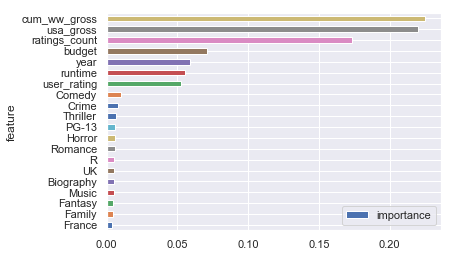

In [25]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(20).plot(x='feature',y='importance',kind='barh')


In [26]:
RMSE(gbm.predict(X_train),y_train)

0.00046012532871766054

In [27]:
RMSE(gbm.predict(X_val),y_val)

0.04948605713617116

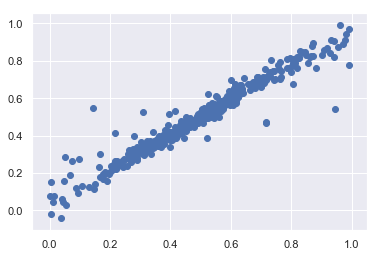

In [28]:
y_pred = gbm.predict(X_val)

plt.scatter(y_val, y_pred)

In [29]:
from sklearn import cross_validation, metrics

cv_score = cross_validation.cross_val_score(gbm, X_train, y_train, cv=5)
cv_score

array([0.92920996, 0.94399785, 0.94484798, 0.95296605, 0.95235869])

In [30]:
cv_score = cross_validation.cross_val_score(gbm, X_val, y_val, cv=5)
cv_score

array([0.79740888, 0.8028333 , 0.86702329, 0.88020328, 0.85135804])

In [31]:
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], axis=0)
X_train.shape

(1935, 66)

In [32]:
X_test.shape

(646, 66)

In [33]:
y_train = pd.concat([y_train, y_val], axis=0)
y_train.shape

(1935,)

In [34]:
cv_score = cross_validation.cross_val_score(gbm, X_train, y_train, cv=5)
cv_score

array([0.92394066, 0.96258286, 0.96277534, 0.95929073, 0.92786493])

In [35]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9999765311845004

In [36]:
#need to test!!!